# How Autoencoders work Understanding and implementation and knowing the intution
​
# Introduction
#contents:
* What are Autoencoders ?
* Implementation and UseCases
* UseCase 1: Image Reconstruction
* UseCase 2: Noise Removal

​
​
​

* What are Autoencoders?
Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.
​
​

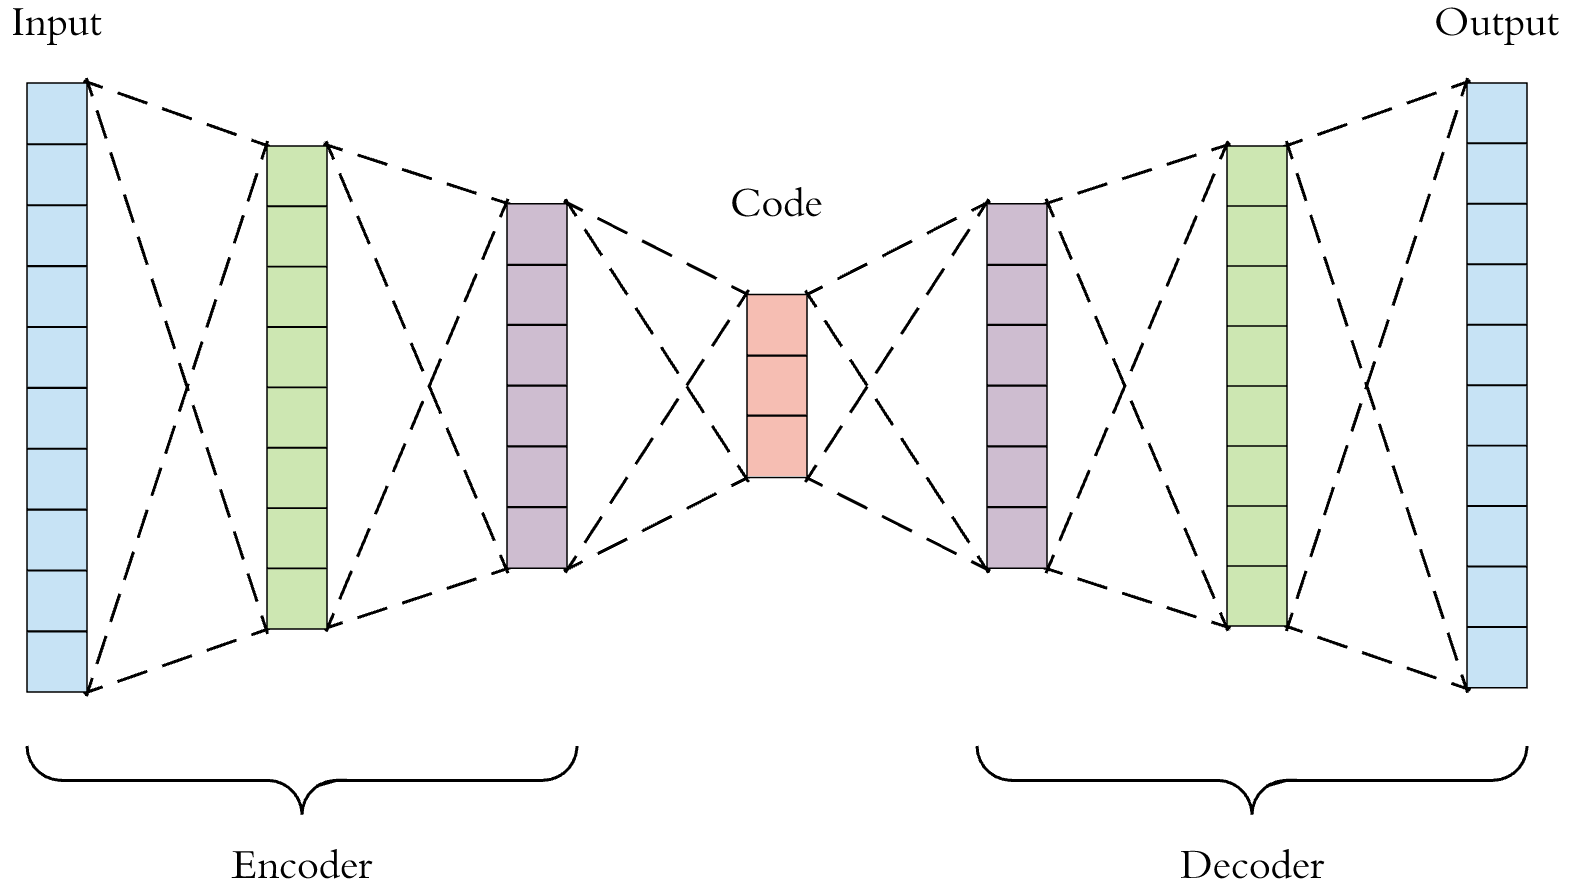

In [0]:
from IPython.display import Image
Image(filename="/auto encoders.png",width = 800)


A typical autoencoder architecture comprises of three main components:

Encoding Architecture : The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.
Latent View Repersentation : Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.
Decoding Architecture : The decoding architecture is the mirror image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.


A highly fine tuned autoencoder model should be able to reconstruct the same input which was passed in the first layer. In this kernel, I will walk you through the working of autoencoders and their implementation.

Lets implement an autoencoder using keras that first learns the features from an image, and then tries to project the same image as the output.

 Implementation
 UseCase 1 : Image Reconstruction
# Load the required libraries

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.layers import Dense,Input  #making a dense layer the normal neural network layer that we make, whatever we will be inputting in dense it will be taking as number of neurons
from keras.models import Model #model is a class which makes to run neuralnetwoks and whatever

Using TensorFlow backend.


# Use case 1:Image Reconstruction

# Preparing the data

In [0]:

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [0]:
x_train = x_train/255.0           #Normalising the data.
x_test =x_test/255.0

In [0]:
x_train  = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test  = x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [0]:
print("x_train shape:",x_train.shape)#our goal is to train on these images.
print("x_test shape:",x_test.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


# 3. Creating Autoencoder architecture

In [0]:
input_neurons = 784
hidden_layers_neurons = 256
code_neurons = 64

In [0]:
input_layer = Input(shape = (input_neurons,))
hidden_layer_1 = Dense(hidden_layers_neurons,activation = 'relu')(input_layer)
code_layer = Dense(code_neurons,activation = 'relu')(hidden_layer_1)
hidden_layer_2 = Dense(hidden_layers_neurons,activation = 'relu')(code_layer)
output_layer = Dense(input_neurons)(hidden_layer_2)

In [0]:
model_name.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               201488    
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_name = Model(input_layer,output_layer)#our model
model_name.compile(optimizer = 'Adadelta',loss = 'binary_crossentropy')
model_name.fit(x_train,x_train,epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.3940
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.3897
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.3847
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.3824
Epoch 5/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.3812
Epoch 6/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.3803
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.3794
Epoch 8/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.3787
Epoch 9/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.3784
Epoch 10/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.3775
Epoch 11/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3772
Epoch 12/20
60000/60000 [=====

In [0]:
predicted = model_name.predict(x_train)

In [0]:
def reshape(image):
  return np.reshape(image,[28,28])

images of input

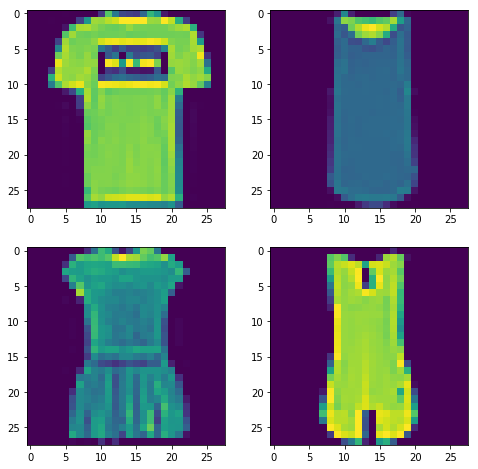

In [0]:
w=3     #plotting  a subplot of input images 
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(x_train[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

images of predicted

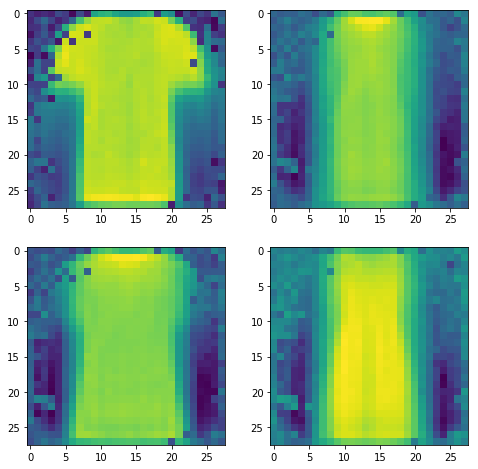

In [0]:
w=3     #plotting  a subplot of predicted images 
h=2
fig=plt.figure(figsize=(8, 8))
columns = 2
rows =2
for i in range(1, columns*rows +1):
    img = reshape(predicted[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Knowing the accuracy

In [0]:
def acc(actual,pred):
  return 100 - (np.mean(actual-pred)**2/np.mean(actual**2))*100

In [0]:
acc(pred[0],x_train[0])

87.19670657590152

## So we can see that an autoencoder trained with 20 epoochs is able to reconstruct the input images very well. Lets look at other use-case of autoencoders - Image denoising or removal of noise from the image in Part2.